In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
 
path = "/content/drive/MyDrive/healthcare-dataset-stroke-data.csv"
df= pd.read_csv(path)

df.describe

In [4]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df['bmi'].fillna(df['bmi'].mean(), inplace = True)


In [6]:
df.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


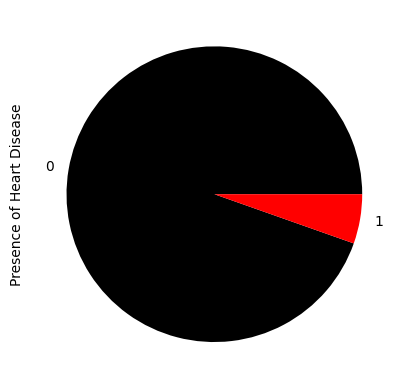

In [9]:
class_counts = df['heart_disease'].value_counts()
colors = ['black', 'red']
class_counts.plot(kind='pie', colors=colors)
plt.ylabel('Presence of Heart Disease')
plt.show()

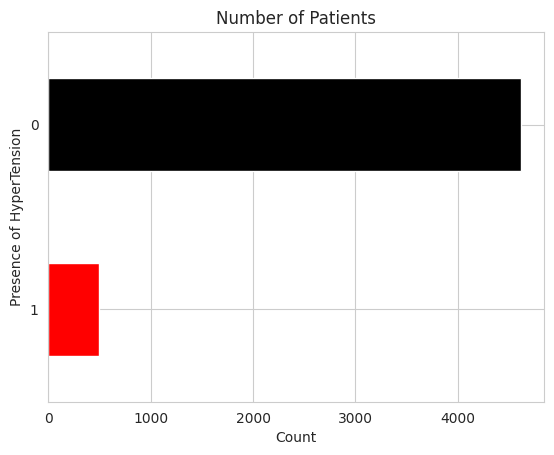

In [10]:
hypertension_counts = df['hypertension'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['red', 'black']

# Create horizontal bar chart of airline counts
hypertension_counts.plot(kind='barh', color=colors)
plt.title("Number of Patients")
plt.xlabel("Count")
plt.ylabel("Presence of HyperTension")
plt.show()

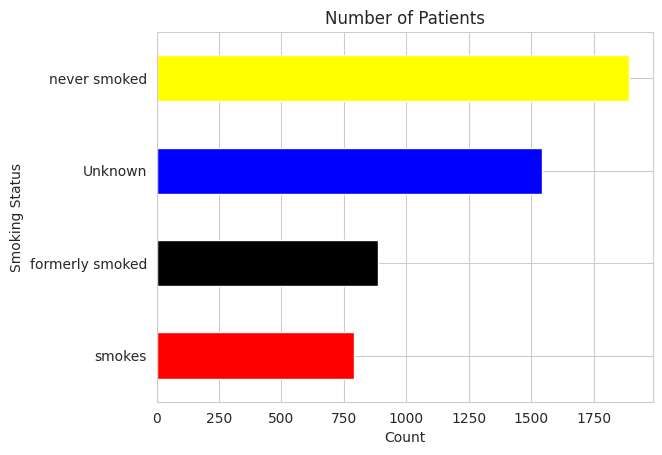

In [11]:
smoking_counts = df['smoking_status'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['red', 'black', 'blue', 'yellow']

# Create horizontal bar chart of airline counts
smoking_counts.plot(kind='barh', color=colors)
plt.title("Number of Patients")
plt.xlabel("Count")
plt.ylabel("Smoking Status")
plt.show()

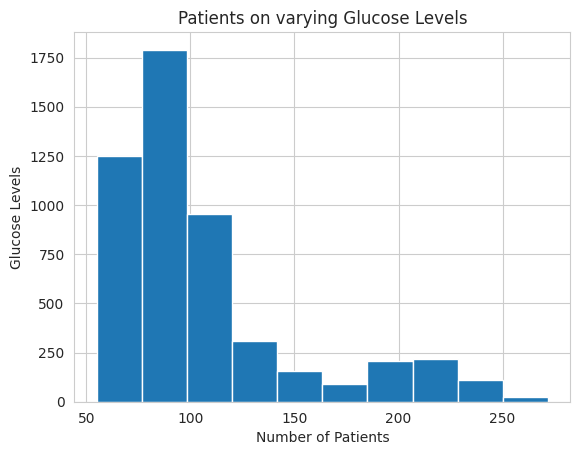

In [12]:
plt.hist(df['avg_glucose_level'], bins=10)

plt.title('Patients on varying Glucose Levels')
plt.xlabel('Number of Patients')
plt.ylabel('Glucose Levels')

# Show the plot
plt.show()

In [16]:
# IDENTIFYING CATEGORICAL VARIABLES IN THE DATASET

cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 5
Categorical columns:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [19]:
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.9 MB/s eta 0:00:00


In [20]:
# PERFORMING TARGET ENCODING FOR ALL CATERGOTICAL VARIABLES

import category_encoders as ce

te = ce.TargetEncoder(cols=cat_cols)
df = te.fit_transform(df, df['stroke'])

In [21]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.051064,67.0,0,1,0.065613,0.050940,0.052003,228.69,36.600000,0.079096,1
1,51676,0.047094,61.0,0,0,0.065613,0.079365,0.045346,202.21,28.893237,0.047569,1
2,31112,0.051064,80.0,0,1,0.065613,0.050940,0.045346,105.92,32.500000,0.047569,1
3,60182,0.047094,49.0,0,0,0.065613,0.050940,0.052003,171.23,34.400000,0.053232,1
4,1665,0.047094,79.0,1,0,0.065613,0.079365,0.045346,174.12,24.000000,0.047569,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.047094,80.0,1,0,0.065613,0.050940,0.052003,83.75,28.893237,0.047569,0
5106,44873,0.047094,81.0,0,0,0.065613,0.079365,0.052003,125.20,40.000000,0.047569,0
5107,19723,0.047094,35.0,0,0,0.065613,0.079365,0.045346,82.99,30.600000,0.047569,0
5108,37544,0.051064,51.0,0,0,0.065613,0.050940,0.045346,166.29,25.600000,0.079096,0


In [22]:
# IDENTIFYING NUMERICAL COLUMNS

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [23]:
# # MIN MAX SCALER

names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1.000000,0.816895,0.0,1.0,1.0,0.628208,1.0,0.801265,0.301260,1.000000,1.0
1,0.708205,0.542445,0.743652,0.0,0.0,1.0,1.000000,0.0,0.679023,0.212981,0.352031,1.0
2,0.426015,1.000000,0.975586,0.0,1.0,1.0,0.628208,0.0,0.234512,0.254296,0.352031,1.0
3,0.824928,0.542445,0.597168,0.0,0.0,1.0,0.628208,1.0,0.536008,0.276060,0.468425,1.0
4,0.021929,0.542445,0.963379,1.0,0.0,1.0,1.000000,0.0,0.549349,0.156930,0.352031,1.0


In [24]:
# SETTING TARGET VARIABLES

y = data_scaled['stroke']

# Extract the input features
x = data_scaled.drop(['stroke'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [26]:
x_train.shape, y_train.shape, x_train_resampled.shape, y_train_resampled.shape


((4088, 11), (4088,), (7802, 11), (7802,))

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train_resampled, y_train_resampled)

#make predictions
y_pred = lr.predict(x_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

# Evaluate the model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7328767123287672


In [28]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model to the training data
model = LogisticRegression()
model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7485322896281801


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10)

dt.fit(x_train_resampled, y_train_resampled)

y_pred = dt.predict(x_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

print('Accuracy: ', accuracy_score(y_pred, y_test))

Accuracy:  0.764187866927593


In [30]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf.fit(x_train_resampled, y_train_resampled)

y_pred = rf.predict(x_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

print('Accuracy: ', accuracy_score(y_pred, y_test))

Accuracy:  0.8405088062622309


In [31]:
import xgboost as xgb

XGB = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 42)

XGB.fit(x_train, y_train)

y_pred = XGB.predict(x_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

print('Accuracy: ', accuracy_score(y_pred, y_test))

Accuracy:  0.9354207436399217


In [32]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)

ada.fit(x_train_resampled, y_train_resampled)

y_pred = ada.predict(x_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

print('Accuracy: ', accuracy_score(y_pred, y_test))

Accuracy:  0.6565557729941291


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, max_depth=3)

gb.fit(x_train_resampled, y_train_resampled)

y_pred = gb.predict(x_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

print('Accuracy: ', accuracy_score(y_pred, y_test))

Accuracy:  0.8542074363992173
